In [9]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization

In [10]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [11]:
#One hot encoding
trainY = to_categorical(trainY)
testY = to_categorical(testY)
print(trainY[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

In [13]:
# define cnn model
def define_model():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    #model.summary()
    
    return model

In [14]:
model = define_model()
#model.summary()

In [15]:
history = model.fit(trainX, trainY, batch_size=32, epochs=30,                 
                    validation_data=(testX,testY),
                    verbose=1)

Epoch 1/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1706 - accuracy: 0.9482 - val_loss: 0.0663 - val_accuracy: 0.9786
Epoch 2/30
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0534 - accuracy: 0.9840 - val_loss: 0.0484 - val_accuracy: 0.9831
Epoch 3/30
 197/1875 [==>...........................] - ETA: 22s - loss: 0.0336 - accuracy: 0.9918

KeyboardInterrupt: 

In [ ]:
#model.save_weights("Resnet/")

In [ ]:
#WARNING !!!! SLOW, CONFIRM BEFORE RUN

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        print(trainX.shape)
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [ ]:
scores, histories = evaluate_model(trainX, trainY)

NameError: name 'evaluate_model' is not defined

In [ ]:
def summarize_diagnostics(histories):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    for i in range(len(histories)):
        # plot loss
        ax1.title.set_text('Cross Entropy Loss')
        ax1.plot(histories[i].history['loss'], color='blue', label='train')
        ax1.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        #pyplot.subplot(2, 1, 2)
        ax2.title.set_text('Classification Accuracy')
        ax2.plot(histories[i].history['accuracy'], color='blue', label='train')
        ax2.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

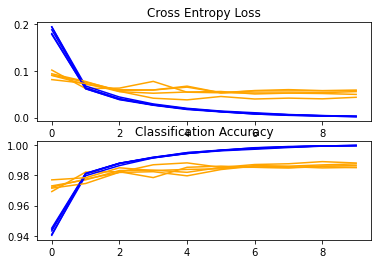

Accuracy: mean=98.652 std=0.121, n=5


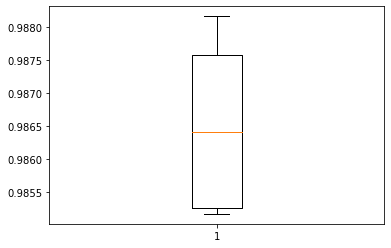

In [ ]:
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)

In [ ]:
#Batch normalization

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
#Increasing convolutional layers
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model